Capture หน้าตัวเอง หรืออัพโหลดรูปตัวเองจากโทรศัพท์

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab import files

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop(); // stop video stream
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Get a photo from the JS
filename = take_photo()
print(f'Captured image saved as {filename}')

# Load the captured image
img = cv2.imread(filename)

# Convert the image from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off') # Hide the axis
plt.show()

# Download the captured image
files.download(filename)
Example Code.py
Displaying Example Code.py.

#### ใช้รูปของเราก็แล้วกัน

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


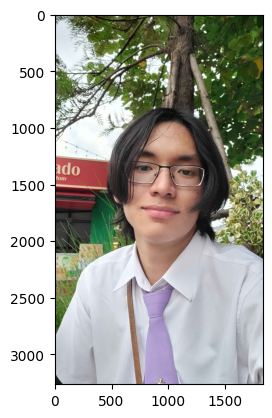

In [11]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Image Processing/Images/'
file_name = '20240616_170946.jpg'
image = Image.open(f'{file_path}/{file_name}')

# Display the image
plt.imshow(image)
image.show()

<function matplotlib.pyplot.show(close=None, block=None)>

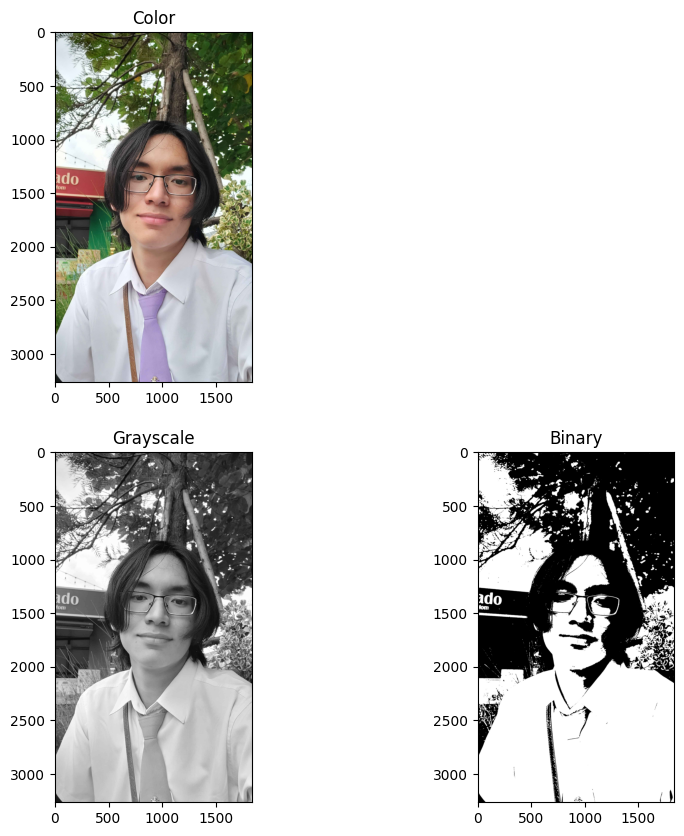

In [12]:
# Convert to grayscale
img_gray = image.convert('L')

# Define a threshold (adjust as needed)
threshold = 128 # ลองปรับขึ้นหรือลงดู
# Convert to Binary
img_binary = img_gray.point(lambda x: 0 if x < threshold else 255, '1')

plt.figure(figsize=(10, 10)) # (W, H) in inches
rows = 2; cols = 2; index = 1

plt.subplot(rows, cols, index); index += 2;
plt.imshow(image, cmap=None)
plt.title('Color')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_binary, cmap='gray')
plt.title('Binary')

plt.show

In [13]:
# เก็บไฟล์รูปภาพไว้ใน Drive
img_gray.save(file_path + 'French_Gray.png')
img_binary.save(file_path + 'French_Binary.png')